In [39]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
from pprint import pprint
import simplekml
from config import EIA_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Call the USGS turbine database API

## Add the response to a DataFrame

In [40]:
base_url="https://eersc.usgs.gov/api/uswtdb/v1/turbines"

In [41]:
response = requests.get(base_url).json()

In [42]:
df = pd.DataFrame(response)
df

,case_id,faa_ors,faa_asn,usgs_pr_id,t_state,t_county,t_fips,p_name,p_year,p_tnum,...,t_ttlh,t_conf_atr,t_conf_loc,t_img_date,t_img_srce,xlong,ylat,eia_id,retrofit,retrofit_year
0,3001247,None,None,5115.0,CA,Kern County,6029,251 Wind,1987.0,194,...,NaN,2,3,5/8/2018,Digital Globe,-118.36819,35.07579,52161.0,0,NaN
1,3009410,None,None,5116.0,CA,Kern County,6029,251 Wind,1987.0,194,...,NaN,2,3,5/8/2018,Digital Globe,-118.36809,35.07589,52161.0,0,NaN
2,3072670,None,None,5112.0,CA,Kern County,6029,251 Wind,1987.0,194,...,NaN,2,3,5/8/2018,Digital Globe,-118.36841,35.07554,52161.0,0,NaN
3,3072663,None,None,5114.0,CA,Kern County,6029,251 Wind,1987.0,194,...,NaN,2,3,5/8/2018,Digital Globe,-118.36820,35.07570,52161.0,0,NaN
4,3072661,None,None,5149.0,CA,Kern County,6029,251 Wind,1987.0,194,...,NaN,2,3,5/8/2018,Digital Globe,-118.36376,35.07791,52161.0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68787,3108971,None,2020-WTW-3724-OE,NaN,TX,Zapata County,48505,unknown Zapata County,2021.0,41,...,NaN,1,3,2/6/2021,Digital Globe,-99.29768,27.09550,NaN,0,NaN
68788,3109386,None,2020-WTW-3723-OE,NaN,TX,Zapata County,48505,unknown Zapata County,2020.0,41,...,NaN,1,3,2/6/2021,Digital Globe,-99.28698,27.09672,NaN,0,NaN
68789,3106411,48-174404,2019-WTW-10988-OE,NaN,TX,Zapata County,48505,unknown Zapata County,2020.0,41,...,NaN,1,3,2/6/2021,Digital Globe,-99.28335,27.15668,NaN,0,NaN
68790,3109758,None,2019-WTW-10984-OE,NaN,TX,Zapata County,48505,unknown Zapata County,2020.0,41,...,NaN,1,3,2/6/2021,Digital Globe,-99.32201,27.12558,NaN,0,NaN


# Remove irrelevant columns for analysis

In [43]:
df.keys()

Index(['case_id', 'faa_ors', 'faa_asn', 'usgs_pr_id', 't_state', 't_county',
       't_fips', 'p_name', 'p_year', 'p_tnum', 'p_cap', 't_manu', 't_model',
       't_cap', 't_hh', 't_rd', 't_rsa', 't_ttlh', 't_conf_atr', 't_conf_loc',
       't_img_date', 't_img_srce', 'xlong', 'ylat', 'eia_id', 'retrofit',
       'retrofit_year'],
      dtype='object')

In [44]:
df = df.drop(columns=['case_id','faa_ors','faa_asn','usgs_pr_id','t_fips','t_rsa','t_cap','t_ttlh','t_conf_atr', 't_conf_loc','t_img_date', 't_img_srce','eia_id', 'retrofit','retrofit_year'])

In [45]:
df = df.rename(columns={'t_state':'State','t_county':'County','p_name':'Wind Farm Name','p_year': 'Year',
                       'p_tnum':'Turbine Count','p_cap':'WF Total MW','t_manu':'Turbine Manufacturer',
                       't_model':'Turbine Model','t_hh': 'Turbine Hub Height','t_rd':'Rotor Diameter','xlong':'lng','ylat':'lat'})

In [46]:
df

,State,County,Wind Farm Name,Year,Turbine Count,WF Total MW,Turbine Manufacturer,Turbine Model,Turbine Hub Height,Rotor Diameter,lng,lat
0,CA,Kern County,251 Wind,1987.0,194,18.43,Vestas,None,NaN,NaN,-118.36819,35.07579
1,CA,Kern County,251 Wind,1987.0,194,18.43,Vestas,None,NaN,NaN,-118.36809,35.07589
2,CA,Kern County,251 Wind,1987.0,194,18.43,Vestas,None,NaN,NaN,-118.36841,35.07554
3,CA,Kern County,251 Wind,1987.0,194,18.43,Vestas,None,NaN,NaN,-118.36820,35.07570
4,CA,Kern County,251 Wind,1987.0,194,18.43,Vestas,None,NaN,NaN,-118.36376,35.07791
...,...,...,...,...,...,...,...,...,...,...,...,...
68787,TX,Zapata County,unknown Zapata County,2021.0,41,NaN,None,None,NaN,NaN,-99.29768,27.09550
68788,TX,Zapata County,unknown Zapata County,2020.0,41,NaN,None,None,NaN,NaN,-99.28698,27.09672
68789,TX,Zapata County,unknown Zapata County,2020.0,41,NaN,None,None,NaN,NaN,-99.28335,27.15668
68790,TX,Zapata County,unknown Zapata County,2020.0,41,NaN,None,None,NaN,NaN,-99.32201,27.12558


In [47]:
#Clean data frame for wind farms built from 2000 forward
modern_WF = df.loc[df['Year']>=2000.0]
modern_WF =modern_WF.reset_index(drop=True)
len(modern_WF['Wind Farm Name'].unique())

1574

In [48]:
#Clean unkown wind farm


duplicate_df=modern_WF.duplicated('Wind Farm Name')
modern_WF['Duplicated']=duplicate_df.values
index_value = modern_WF[modern_WF['Duplicated']==True].index

modern_WF_clean = modern_WF.drop(index=modern_WF.index[index_value])

modern_WF_clean

,State,County,Wind Farm Name,Year,Turbine Count,WF Total MW,Turbine Manufacturer,Turbine Model,Turbine Hub Height,Rotor Diameter,lng,lat,Duplicated
0,IA,Boone County,30 MW Iowa DG Portfolio,2017.0,10,30.00,Nordex,AW125/3000,87.5,125.0,-93.70042,41.97761,False
10,MA,Barnstable County,6th Space Warning Squadron,2013.0,2,3.36,GE Wind,GE1.68-82.5,80.0,82.5,-70.54180,41.75249,False
12,MA,Barnstable County,AFCEE MMR Turbines,2011.0,2,3.00,GE Wind,GE1.5-77,80.0,77.0,-70.54530,41.75759,False
14,IA,Story County,AG Land 1,2012.0,6,9.60,GE Wind,GE1.6-82.5,80.0,82.5,-93.32569,42.20639,False
15,IA,Story County,AG Land 2,2012.0,6,9.60,GE Wind,GE1.6-82.5,80.0,82.5,-93.42809,42.14609,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63151,TX,Wilbarger County,unknown Wilbarger County,2018.0,6,NaN,None,None,NaN,NaN,-99.41830,34.28581,False
63390,NY,Wyoming County,unknown Wyoming County,2016.0,1,NaN,None,None,NaN,NaN,-78.18794,42.74082,False
63391,TX,Young County,unknown Young County 1,2011.0,1,NaN,None,None,NaN,NaN,-98.55109,33.09329,False
63392,CO,Yuma County,unknown Yuma County,2016.0,2,NaN,None,None,NaN,NaN,-102.71695,40.03755,False


In [49]:
#drop NA Total MW

modern_WF_MW = modern_WF_clean.dropna(subset=['WF Total MW'])
modern_WF_MW.to_csv("wf.csv",
                  encoding="utf-8", index=True, header=True)

# Save the wind farms to a kml file

In [50]:
kml = simplekml.Kml()
modern_WF_MW.apply(lambda X: kml.newpoint(name=X["Wind Farm Name"], coords=[( X["lng"],X["lat"])]) ,axis=1)
kml.save("WF_US.kml")

# Plot wind farm installed capacity trends

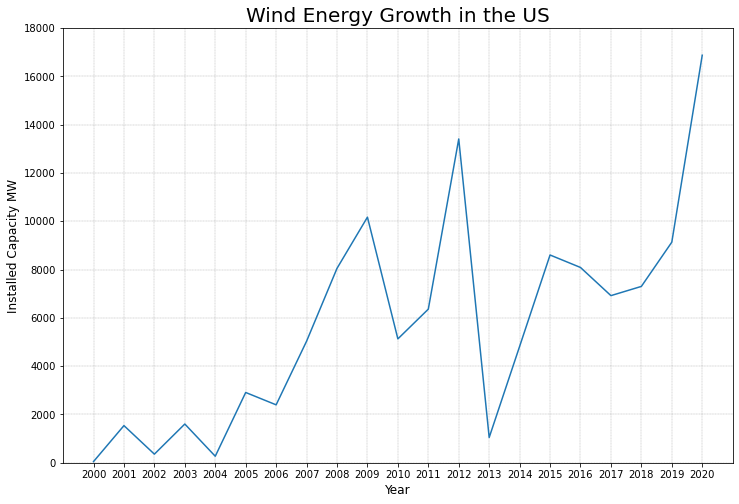

In [51]:
WF_year = modern_WF_MW.groupby('Year')
MW_year = WF_year['WF Total MW'].sum()
x = MW_year.index
y = MW_year.values
plt.subplots(figsize=(12, 8))
plt.plot(x,y)
plt.xlabel('Year',fontsize=12)
plt.ylabel('Installed Capacity MW',fontsize=12)
plt.title('Wind Energy Growth in the US',fontsize=20)
plt.ylim(0,18000)
plt.grid(color='grey', linestyle='--', linewidth=0.3)
plt.xticks(range(2000,2021))
plt.show()

# Plot wind farm installed capacity by state

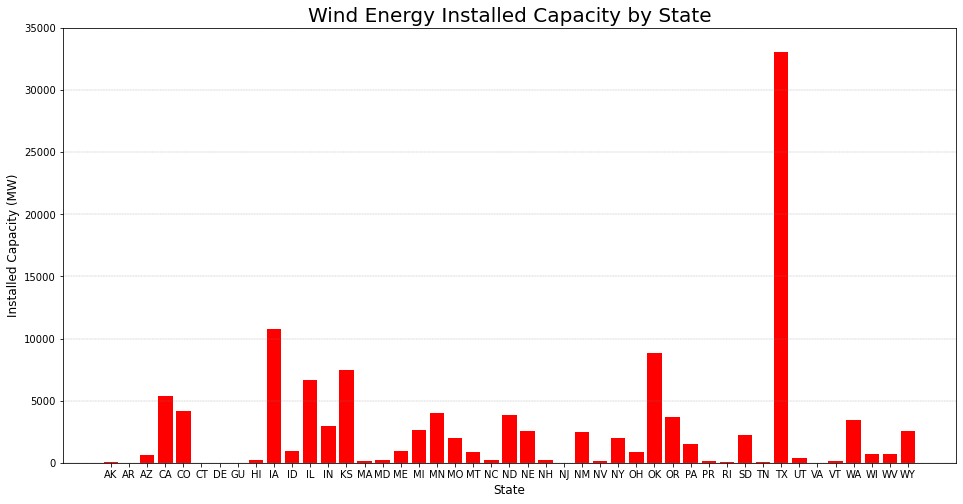

In [52]:
WF_state = modern_WF_MW.groupby('State')
WF_state_MW = WF_state['WF Total MW'].sum()
x = WF_state_MW.index
y = WF_state_MW.values
plt.subplots(figsize=(16, 8))
plt.bar(x,y,color='r')
plt.xlabel('State',fontsize=12)
plt.ylabel('Installed Capacity (MW)',fontsize=12)
plt.title('Wind Energy Installed Capacity by State',fontsize=20)
plt.ylim(0,35000)
plt.grid(axis='y',color='grey', linestyle='--', linewidth=0.3)
plt.show()

In [53]:
coords = []
cities = []
       
#Generate a random list of 500+ cities
lat = modern_WF_MW['lat']
lng = modern_WF_MW['lng']
coords = list(zip(lat,lng))

for coord in coords:
    cityname = citipy.nearest_city(float(coord[0]), float(coord[1])).city_name
    cities.append(cityname)

In [54]:
modern_WF_MW = modern_WF_MW.drop(columns=['Duplicated'])
modern_WF_MW['City'] = cities
modern_WF_MW

,State,County,Wind Farm Name,Year,Turbine Count,WF Total MW,Turbine Manufacturer,Turbine Model,Turbine Hub Height,Rotor Diameter,lng,lat,City
0,IA,Boone County,30 MW Iowa DG Portfolio,2017.0,10,30.00,Nordex,AW125/3000,87.5,125.0,-93.70042,41.97761,ames
10,MA,Barnstable County,6th Space Warning Squadron,2013.0,2,3.36,GE Wind,GE1.68-82.5,80.0,82.5,-70.54180,41.75249,sandwich
12,MA,Barnstable County,AFCEE MMR Turbines,2011.0,2,3.00,GE Wind,GE1.5-77,80.0,77.0,-70.54530,41.75759,sandwich
14,IA,Story County,AG Land 1,2012.0,6,9.60,GE Wind,GE1.6-82.5,80.0,82.5,-93.32569,42.20639,ames
15,IA,Story County,AG Land 2,2012.0,6,9.60,GE Wind,GE1.6-82.5,80.0,82.5,-93.42809,42.14609,ames
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61213,OH,Hancock County,Zephyr Wind Project 2.0,2019.0,3,4.50,Goldwind,GW87,80.0,87.0,-83.63660,41.08840,findlay
61216,NY,Ontario County,Zotos,2011.0,2,3.30,Hyundai,HQ1650,70.0,82.0,-76.96765,42.88625,geneva
61221,VT,Addison County,unknown Addison County,2013.0,1,0.10,Northern Power Systems,NPS-100,37.0,21.0,-73.31070,44.00279,middlebury
61935,TX,El Paso County,unknown El Paso County,2015.0,2,3.40,GE Wind,GE1.7-100,80.0,100.0,-106.40543,31.78812,el paso


# Average turbine height trends

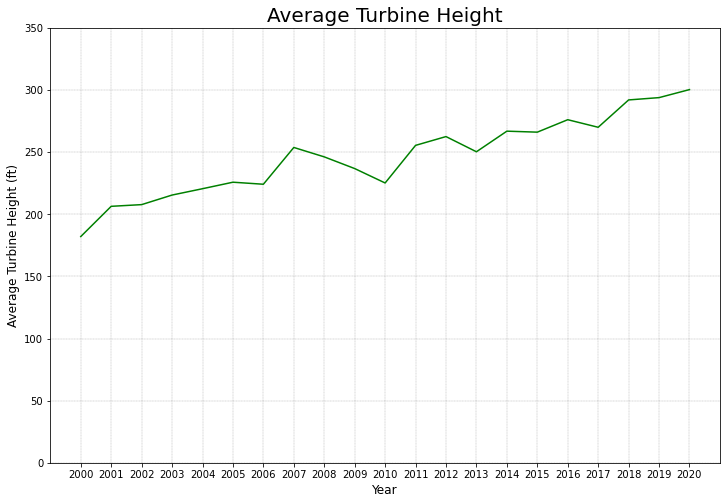

In [55]:
height_year = modern_WF_MW.groupby('Year')
height_year = (height_year['Turbine Hub Height'].mean()) * 3.28084
x = height_year.index
y = height_year.values
plt.subplots(figsize=(12, 8))
plt.plot(x,y,color='g')
plt.xlabel('Year',fontsize=12)
plt.ylabel('Average Turbine Height (ft)',fontsize=12)
plt.title('Average Turbine Height',fontsize=20)
plt.ylim(0,350)
plt.grid(color='grey', linestyle='--', linewidth=0.3)
plt.xticks(range(2000,2021))
plt.show()

# Average rotor diameter trends

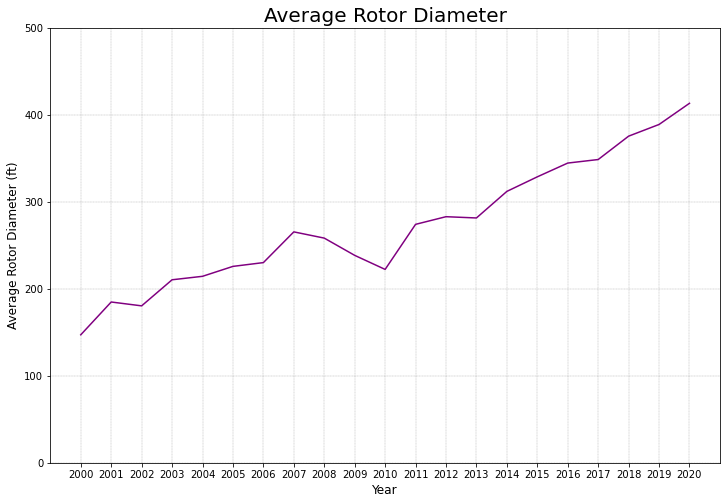

In [56]:
diameter_year = modern_WF_MW.groupby('Year')
diameter_year = (diameter_year['Rotor Diameter'].mean()) * 3.28084
x = diameter_year.index
y = diameter_year.values
plt.subplots(figsize=(12, 8))
plt.plot(x,y,color='purple')
plt.xlabel('Year',fontsize=12)
plt.ylabel('Average Rotor Diameter (ft)',fontsize=12)
plt.title('Average Rotor Diameter',fontsize=20)
plt.ylim(0,500)
plt.grid(color='grey', linestyle='--', linewidth=0.3)
plt.xticks(range(2000,2021))
plt.show()

In [57]:
state_county = modern_WF_MW.groupby(['State','County'])
county_MW = state_county['WF Total MW'].sum()
#county_MW.to_csv("wf.csv",
#                  encoding="utf-8", index=True, header=True)

county_max_MW= county_MW.idxmax()
max_MW = county_MW.max()

print(f'{county_max_MW[1]} in {county_max_MW[0]} is the county with the maximum installed MW in the country, with a total of {max_MW} MW.' )

Kern County in CA is the county with the maximum installed MW in the country, with a total of 3084.4 MW.


# Iowa Plots

In [58]:
iowa_df = modern_WF_MW.loc[modern_WF_MW['State']=='IA']
iowa_df

,State,County,Wind Farm Name,Year,Turbine Count,WF Total MW,Turbine Manufacturer,Turbine Model,Turbine Hub Height,Rotor Diameter,lng,lat,City
0,IA,Boone County,30 MW Iowa DG Portfolio,2017.0,10,30.0,Nordex,AW125/3000,87.5,125.0,-93.70042,41.97761,ames
14,IA,Story County,AG Land 1,2012.0,6,9.6,GE Wind,GE1.6-82.5,80.0,82.5,-93.32569,42.20639,ames
15,IA,Story County,AG Land 2,2012.0,6,9.6,GE Wind,GE1.6-82.5,80.0,82.5,-93.42809,42.14609,ames
16,IA,Story County,AG Land 3,2012.0,6,9.6,GE Wind,GE1.6-82.5,80.0,82.5,-93.43199,42.14559,ames
17,IA,Story County,AG Land 4,2012.0,6,9.6,GE Wind,GE1.6-82.5,80.0,82.5,-93.35490,41.90419,altoona
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60534,IA,Worth County,Wind Walkers,2011.0,1,1.6,GE Wind,GE1.6-82.5,80.0,82.5,-93.22149,43.38469,mason city
60802,IA,Winnebago County,Winnebago I,2008.0,10,20.0,Gamesa,G83-2.0,78.0,83.0,-93.78389,43.31819,ledyard
60814,IA,Cass County,Wiota Wind,2012.0,1,1.6,GE Wind,GE1.6-82.5,80.0,82.5,-94.87679,41.39150,carroll
60897,IA,Adair County,Wolverine,2010.0,1,1.5,GE Wind,GE1.5-77,80.0,77.0,-94.44479,41.39309,clive


In [59]:
# running some simple stats on energy output
iowa_df["WF Total MW"].describe()

count    140.000000
mean      77.173357
std       89.923129
min        0.100000
25%        1.790000
50%       43.000000
75%      140.190000
max      495.010000
Name: WF Total MW, dtype: float64

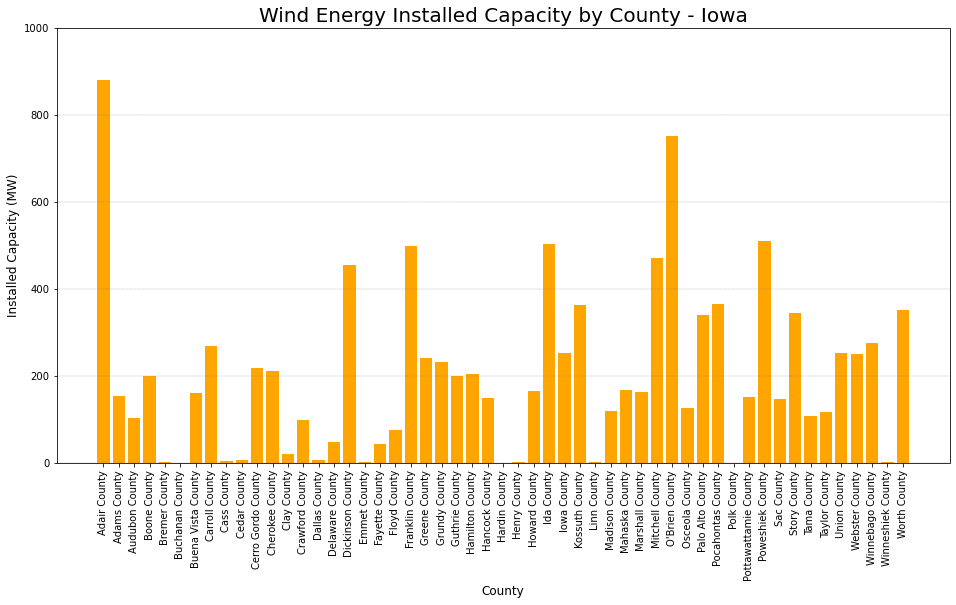

In [60]:
WF_IA = iowa_df.groupby('County')
WF_county_IA = WF_IA['WF Total MW'].sum()
x = WF_county_IA.index
y = WF_county_IA.values
plt.subplots(figsize=(16, 8))
plt.bar(x,y,color='orange')
plt.xlabel('County',fontsize=12)
plt.ylabel('Installed Capacity (MW)',fontsize=12)
plt.title('Wind Energy Installed Capacity by County - Iowa',fontsize=20)
plt.ylim(0,1000)
plt.xticks(rotation = 90)
plt.grid(axis='y',color='grey', linestyle='--', linewidth=0.3)
plt.show()

# Oklahoma Plots

In [61]:
oklahoma_df = modern_WF_MW.loc[modern_WF_MW['State']=='OK']
oklahoma_df

,State,County,Wind Farm Name,Year,Turbine Count,WF Total MW,Turbine Manufacturer,Turbine Model,Turbine Hub Height,Rotor Diameter,lng,lat,City
1544,OK,Murray County,Arbuckle Mountain,2015.0,50,100.00,Vestas,V110-2.0,80.0,110.0,-97.19896,34.39424,ardmore
1632,OK,Garfield County,Armadillo Flats,2018.0,126,247.28,GE Wind,GE1.79-100,80.0,100.0,-97.53968,36.27013,enid
2440,OK,Beaver County,Balko Wind,2015.0,162,299.70,GE Wind,GE1.85-87,80.0,87.0,-100.80332,36.54136,liberal
3799,OK,Roger Mills County,Big Smile Wind Farm at Dempsey Ridge,2012.0,66,132.00,Gamesa,G90-2.0,78.0,90.0,-99.84719,35.53270,elk city
4891,OK,Kay County,Blackwell,2012.0,26,59.80,Siemens,SWT-2.3-108,80.0,108.0,-97.42510,36.86459,ponca city
...,...,...,...,...,...,...,...,...,...,...,...,...,...
55007,OK,Dewey County,Taloga,2011.0,54,129.60,Mitsubishi,MWT95/2.4,80.0,95.0,-98.93169,35.84679,clinton
55324,OK,Noble County,Thunder Ranch,2017.0,120,297.80,GE Wind,GE2.3-116,80.0,116.0,-97.30306,36.57061,ponca city
58516,OK,Custer County,Weatherford Wind Energy Center,2005.0,71,106.50,GE Wind,GE1.5-77,80.0,77.0,-98.74320,35.49469,weatherford
58588,OK,Washita County,Weatherford Wind Energy Center Expansion,2005.0,27,40.50,GE Wind,GE1.5-77,80.0,77.0,-98.65730,35.46230,weatherford


In [62]:
oklahoma_df["WF Total MW"].describe()

count     61.000000
mean     145.494590
std       78.290797
min        0.100000
25%       99.000000
50%      129.880000
75%      198.900000
max      310.640000
Name: WF Total MW, dtype: float64

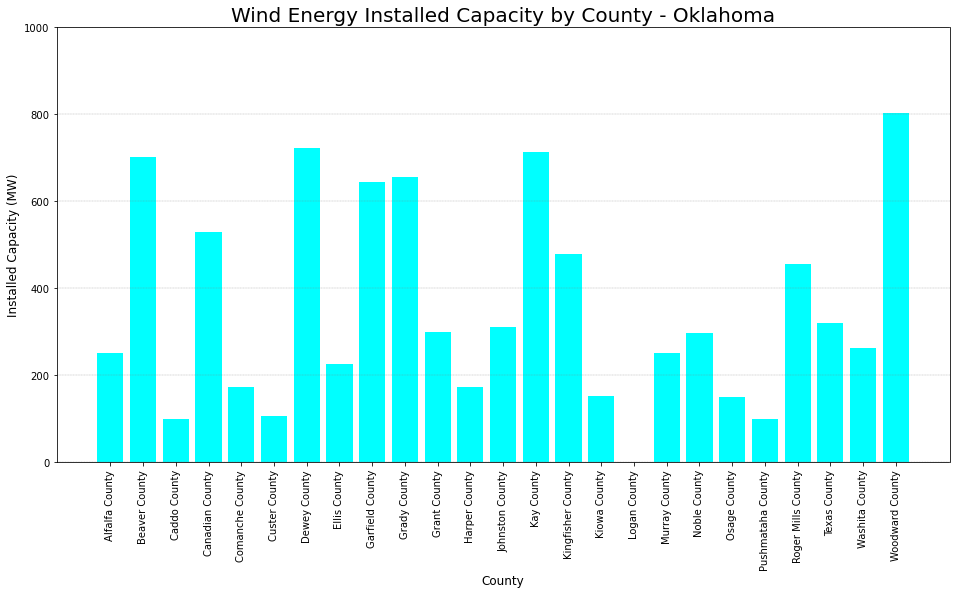

In [63]:
WF_OK = oklahoma_df.groupby('County')
WF_county_OK = WF_OK['WF Total MW'].sum()
x = WF_county_OK.index
y = WF_county_OK.values
plt.subplots(figsize=(16, 8))
plt.bar(x,y,color='cyan')
plt.xlabel('County',fontsize=12)
plt.ylabel('Installed Capacity (MW)',fontsize=12)
plt.title('Wind Energy Installed Capacity by County - Oklahoma',fontsize=20)
plt.ylim(0,1000)
plt.xticks(rotation = 90)
plt.grid(axis='y',color='grey', linestyle='--', linewidth=0.3)
plt.show()

# Oregon plots

In [64]:
oregon_df = modern_WF_MW.loc[modern_WF_MW['State']=='OR']
oregon_df

,State,County,Wind Farm Name,Year,Turbine Count,WF Total MW,Turbine Manufacturer,Turbine Model,Turbine Hub Height,Rotor Diameter,lng,lat,City
3224,OR,Baker County,Benson Creek,2017.0,5,10.00,GE Wind,GE2.0-116,80.0,116.0,-117.27673,44.42429,weiser
3904,OR,Sherman County,Biglow Canyon I,2007.0,76,125.40,Vestas,V82-1.65,80.0,82.0,-120.58518,45.66919,toppenish
3980,OR,Sherman County,Biglow Canyon II,2009.0,65,149.50,Siemens,SWT-2.3-93,80.0,93.0,-120.59669,45.63350,toppenish
4046,OR,Sherman County,Biglow Canyon III,2010.0,76,174.80,Siemens,SWT-2.3-93,80.0,93.0,-120.54809,45.64840,toppenish
12516,OR,Umatilla County,Chopin,2016.0,6,9.90,GE Wind,GE1.7-103,80.0,103.0,-118.47427,45.89413,college place
13195,OR,Umatilla County,Combine Hills I,2003.0,41,41.00,Mitsubishi,MWT62/1.0,55.0,61.4,-118.58139,45.92822,college place
13237,OR,Umatilla County,Combine Hills II,2009.0,63,63.00,Mitsubishi,MWT62/1.0,69.0,61.4,-118.54128,45.93189,college place
13352,OR,Gilliam County,"Condon Wind Project, phase I",2001.0,41,24.60,Mitsubishi,MWT600,60.0,47.0,-120.28159,45.28019,grandview
13393,OR,Gilliam County,"Condon Wind Project, phase II",2002.0,42,25.20,Mitsubishi,MWT600,60.0,47.0,-120.27189,45.28259,grandview
15520,OR,Marion County,Doerfler Farms,2011.0,1,0.25,Siva,SI.250,30.0,30.0,-122.80687,44.86757,hayesville


In [65]:
oregon_df["WF Total MW"].describe()

count     41.000000
mean      88.936585
std       85.267276
min        0.250000
25%       10.000000
50%       75.000000
75%      102.900000
max      299.540000
Name: WF Total MW, dtype: float64

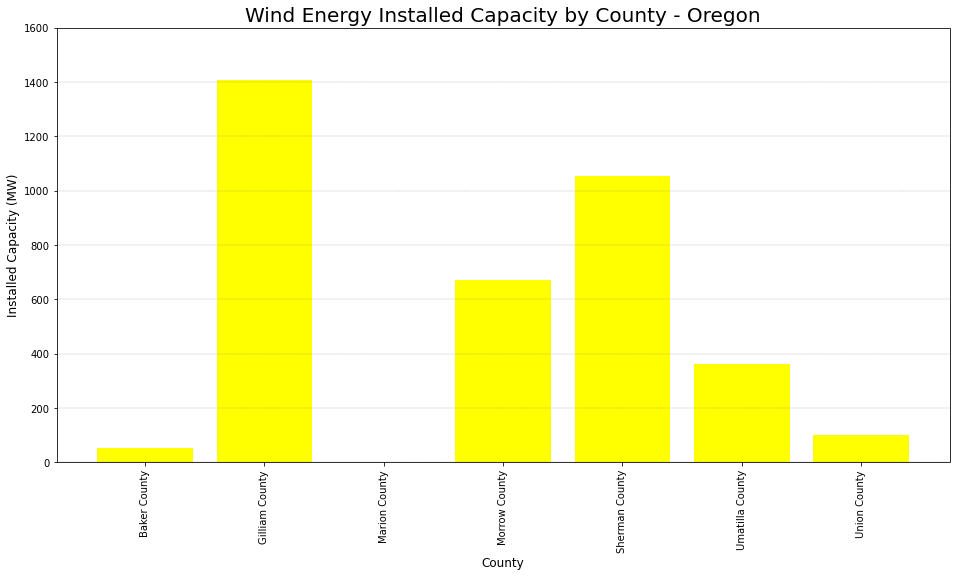

In [66]:
WF_OR = oregon_df.groupby('County')
WF_county_OR = WF_OR["WF Total MW"].sum()
x = WF_county_OR.index
y = WF_county_OR.values
plt.subplots(figsize=(16, 8))
plt.bar(x,y,color = 'yellow')
plt.xlabel('County',fontsize=12)
plt.ylabel('Installed Capacity (MW)',fontsize=12)
plt.title('Wind Energy Installed Capacity by County - Oregon',fontsize=20)
plt.ylim(0,1600)
plt.xticks(rotation = 90)
plt.grid(axis='y',color='grey', linestyle='--', linewidth=0.3)
plt.show()

# California Plots

In [67]:
calif_df = modern_WF_MW.loc[modern_WF_MW['State']=='CA']
calif_df

,State,County,Wind Farm Name,Year,Turbine Count,WF Total MW,Turbine Manufacturer,Turbine Model,Turbine Hub Height,Rotor Diameter,lng,lat,City
244,CA,Kern County,Alite Wind Farm,2008.0,8,24.0,Vestas,V90-3.0,80.0,90.0,-118.33999,35.03600,tehachapi
294,CA,Kern County,Alta I,2010.0,100,150.0,GE Wind,GE1.5-77,80.0,77.0,-118.36419,35.02810,tehachapi
394,CA,Kern County,Alta II,2010.0,50,150.0,Vestas,V90-3.0,80.0,90.0,-118.23441,35.00824,tehachapi
435,CA,Kern County,Alta III,2011.0,50,150.0,Vestas,V90-3.0,80.0,90.0,-118.26739,35.00600,tehachapi
485,CA,Kern County,Alta IV,2011.0,34,102.0,Vestas,V90-3.0,80.0,90.0,-118.25889,35.02079,tehachapi
...,...,...,...,...,...,...,...,...,...,...,...,...,...
57937,CA,Riverside County,Wagner,2012.0,2,6.0,Vestas,V90-3.0,80.0,90.0,-116.55559,33.90889,desert hot springs
58095,CA,Tehama County,Walmart Red Bluff,2012.0,1,1.5,GE Wind,GE1.5-77,65.0,77.0,-122.19389,40.11120,red bluff
59744,CA,Riverside County,Whitewater Hill,2002.0,41,61.5,GE Wind,GE1.5-65,65.0,65.0,-116.61581,33.92584,palm springs
60535,CA,Kern County,Windland,2009.0,2,3.0,AAER,A-1500,80.0,77.0,-118.33438,35.09159,tehachapi


In [68]:
calif_df["WF Total MW"].describe()

count     90.000000
mean      59.569000
std       61.421324
min        0.230000
25%        3.000000
50%       37.400000
75%      102.500000
max      222.780000
Name: WF Total MW, dtype: float64

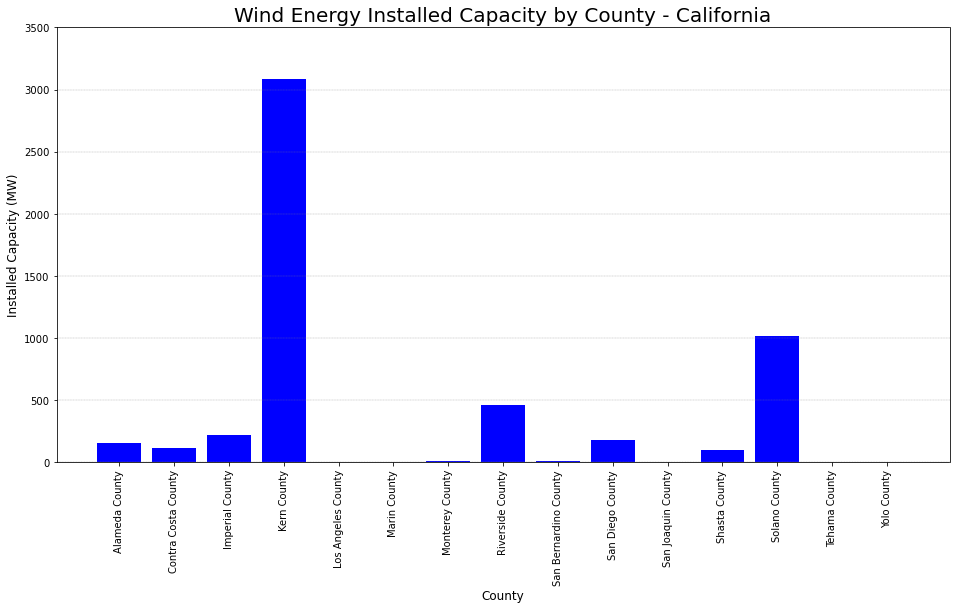

In [69]:
WF_CA = calif_df.groupby('County')
WF_county_CA = WF_CA["WF Total MW"].sum()
x = WF_county_CA.index
y = WF_county_CA.values
plt.subplots(figsize=(16, 8))
plt.bar(x,y,color = 'blue')
plt.xlabel('County',fontsize=12)
plt.ylabel('Installed Capacity (MW)',fontsize=12)
plt.title('Wind Energy Installed Capacity by County - California',fontsize=20)
plt.ylim(0,3500)
plt.xticks(rotation = 90)
plt.grid(axis='y',color='grey', linestyle='--', linewidth=0.3)
plt.show()

# Texas plot

In [70]:
texas_df = modern_WF_MW.loc[modern_WF_MW['State']=='TX']
texas_df

,State,County,Wind Farm Name,Year,Turbine Count,WF Total MW,Turbine Manufacturer,Turbine Model,Turbine Hub Height,Rotor Diameter,lng,lat,City
781,TX,Fisher County,Amadeus,2020.0,96,250.12,GE Wind,GE2.82-127,89.0,127.0,-100.56799,32.91327,snyder
942,TX,Scurry County,Amazon Wind Farm Texas,2017.0,110,253.00,GE Wind,GE2.3-116,80.0,116.0,-101.00261,32.87671,snyder
1205,TX,Lubbock County,American Windmill Museum,2005.0,1,0.66,Vestas,V47-0.66,50.0,47.0,-101.82389,33.58089,lubbock
1206,TX,Kinney County,Anacacho,2012.0,55,99.00,Vestas,V100-1.8,80.0,100.0,-100.20351,29.18324,uvalde
1280,TX,Denton County,Apogee Stadium Wind,2012.0,3,0.30,Northern Power Systems,NW100,37.0,21.0,-97.16100,33.20120,denton
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60596,TX,Archer County,Windthorst-2,2014.0,28,64.40,Siemens,SWT-2.3-108,80.0,108.0,-98.50011,33.49516,graham
60820,TX,Cooke County,Wolf Ridge,2008.0,75,112.50,GE Wind,GE1.5-82.5,80.0,82.5,-97.44919,33.73179,gainesville
60947,TX,Pecos County,Woodward Mountain I,2001.0,125,82.50,Gamesa,G47-0.66,50.0,47.0,-102.47739,30.94780,west odessa
61074,TX,Pecos County,Woodward Mountain II,2001.0,115,75.90,Gamesa,G47-0.66,50.0,47.0,-102.42529,30.94320,west odessa


In [71]:
texas_df["WF Total MW"].describe()

count    219.000000
mean     150.996849
std       99.002419
min        0.100000
25%       80.230000
50%      150.000000
75%      201.600000
max      525.020000
Name: WF Total MW, dtype: float64

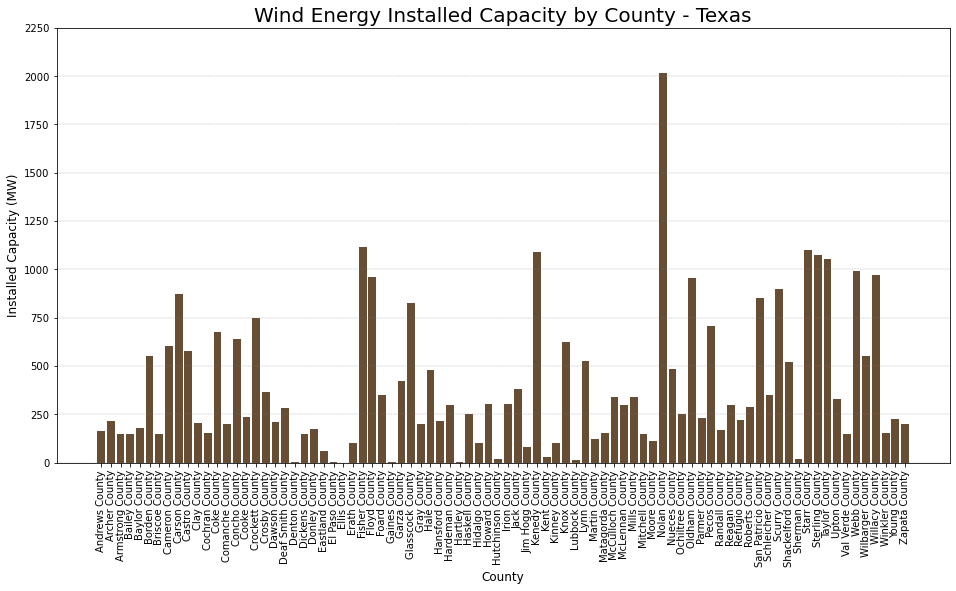

In [72]:
WF_TX = texas_df.groupby('County')
WF_county_TX = WF_TX["WF Total MW"].sum()
x = WF_county_TX.index
y = WF_county_TX.values
plt.subplots(figsize=(16, 8))
plt.bar(x,y,color = (0.4, 0.3, 0.2))
plt.xlabel('County',fontsize=12)
plt.ylabel('Installed Capacity (MW)',fontsize=12)
plt.title('Wind Energy Installed Capacity by County - Texas',fontsize=20)
plt.ylim(0,2250)
plt.xticks(rotation = 90)
plt.grid(axis='y',color='grey', linestyle='--', linewidth=0.3)
plt.show()

In [73]:
#url = 'http://api.eia.gov/category/?api_key=1f2a71904ae87f612b55d3820a8711a8&category_id=40367'
#url='http://api.eia.gov/category/?api_key=1f2a71904ae87f612b55d3820a8711a8&category_id=711238'
base_url = 'http://api.eia.gov/series/?'

In [80]:

coal_prod = []

# US Enenery Information Administration (EIA) API
# Get energy production per source in the US and CO2 emission per year in the USA

series_name = 'TOTAL.CLPRBUS.A'
query_url = base_url + 'api_key=' + EIA_api_key + '&series_id='+series_name
coal_response = requests.get(query_url).json()

series_name = 'TOTAL.CLPRBUS.A'
query_url = base_url + 'api_key=' + EIA_api_key + '&series_id='+series_name
oil_response = requests.get(query_url).json()

series_name = 'TOTAL.GETCBUS.A'
query_url = base_url + 'api_key=' + EIA_api_key + '&series_id='+series_name
geothermal_response = requests.get(query_url).json()

series_name = 'TOTAL.HVTCBUS.A'
query_url = base_url + 'api_key=' + EIA_api_key + '&series_id='+series_name
hydropower_response = requests.get(query_url).json()

series_name = 'TOTAL.NGPRBUS.A'
query_url = base_url + 'api_key=' + EIA_api_key + '&series_id='+series_name
naturalgasdry_response = requests.get(query_url).json()

series_name = 'TOTAL.NLPRBUS.A;'
query_url = base_url + 'api_key=' + EIA_api_key + '&series_id='+series_name
naturalgasliquid_response = requests.get(query_url).json()

series_name = 'TOTAL.NUETBUS.A;'
query_url = base_url + 'api_key=' + EIA_api_key + '&series_id='+series_name
nuclear_response = requests.get(query_url).json()

series_name = 'TOTAL.SOTCBUS.A;'
query_url = base_url + 'api_key=' + EIA_api_key + '&series_id='+series_name
solar_response = requests.get(query_url).json()

series_name = 'TOTAL.BMPRBUS.A;'
query_url = base_url + 'api_key=' + EIA_api_key + '&series_id='+series_name
biomass_response = requests.get(query_url).json()

series_name = 'TOTAL.WYTCBUS.A;'
query_url = base_url + 'api_key=' + EIA_api_key + '&series_id='+series_name
wind_response = requests.get(query_url).json()

series_name = 'TOTAL.FFPRBUS.A;'
query_url = base_url + 'api_key=' + EIA_api_key + '&series_id='+series_name
fossilfuel_response = requests.get(query_url).json()

series_name = 'TOTAL.TEPRBUS.A;'
query_url = base_url + 'api_key=' + EIA_api_key + '&series_id='+series_name
primary_response = requests.get(query_url).json()

series_name = 'TOTAL.REPRBUS.A;'
query_url = base_url + 'api_key=' + EIA_api_key + '&series_id='+series_name
renewable_response = requests.get(query_url).json()

series_name = 'TOTAL.TETCEUS.A;'
query_url = base_url + 'api_key=' + EIA_api_key + '&series_id='+series_name
CO2emission = requests.get(query_url).json()

coal_prod.append(response['series'])
coal_prod

TypeError: list indices must be integers or slices, not str

NameError: name 'coal_response' is not defined